1. Defina un retraso de primer orden y explique sus dos formulaciones
    Un retraso de primer orden modela un proceso en el que una variable (el stock) reacciona con retardo a un cambio en la entrada. Es común en procesos físicos, biológicos y sociales.
    Formulaciones:

    Seguimiento de flujo: La salida es proporcional al stock actual dividido entre el tiempo de retardo:
    salida = stock / retardo
    ​
    Búsqueda de objetivo: El flujo de ajuste es proporcional a la diferencia entre el objetivo y el stock:
    flujo = (objetivo − stock) / retardo

2. Seguimiento de flujo (salida = stock/retardo)
    Esta formulación indica que la tasa a la que una cantidad sale de un sistema es directamente proporcional al nivel de stock que hay en el sistema. Es útil para modelar procesos de drenaje o disipación.

3. Búsqueda de objetivo (flujo = (objetivo - stock)/retardo)
    Este modelo representa un sistema que trata de alcanzar un valor objetivo. El flujo se ajusta con base en la diferencia entre el estado deseado y el actual, ajustándose gradualmente con una constante de tiempo (retardo).

4. Describa la condición de equilibrio (entrada = salida) y cómo los stocks se ajustan exponencialmente.
    El equilibrio se alcanza cuando la entrada es igual a la salida, por lo que el stock se mantiene constante.
    Cuando hay un desbalance, el stock cambia y tiende exponencialmente al nuevo punto de equilibrio, con una tasa determinada por el retardo.
    El comportamiento es de la forma: stock(𝑡) = stockeq + (stock0 − stockeq)⋅𝑒 ^−𝑡/retardo

5. Explique por qué los sistemas lineales permiten la superposición (las soluciones se pueden sumar).
    Los sistemas lineales satisfacen los principios de homogeneidad y aditividad, lo cual permite que la respuesta a múltiples entradas sea la suma de las respuestas individuales. Esto hace posible analizar entradas complejas descomponiéndolas en partes simples.

6. Dado un stock con un valor inicial de 100, una entrada de 5/día y un retraso de 10 días:
    a. Calcule el valor de equilibrio del stock.
    En equilibrio:

    salida = stock/retardo=entrada⇒stockeq/10=5⇒stockeq=50

    b. Dibuje la trayectoria del stock de salida a lo largo del tiempo.
        El stock parte de 100 y tiende exponencialmente a 50 con un retardo de 10 días.
    Gráficamente: stock(𝑡)=50+(100−50)𝑒 ^−𝑡/10=50+50 ^𝑒−𝑡/10

    Esto es una curva descendente exponencial, acercándose asintóticamente a 50.

    c. Compare los retrasos sin memoria y los retrasos por etapas (distribuciones de Erlang). ¿Cuándo
    utilizaría cada uno?

    Retraso sin memoria: Modela procesos donde la salida depende solo del estado actual, como el tiempo entre llegadas de eventos aleatorios.
    Se usa cuando el proceso es aleatorio o impredecible, como llamadas telefónicas.

    Retrasos por etapas (Erlang): Representan procesos donde un elemento pasa por varias etapas con tiempos similares.
    Se usa cuando el proceso es más determinista y uniforme, como el paso por estaciones de producción.

Práctica

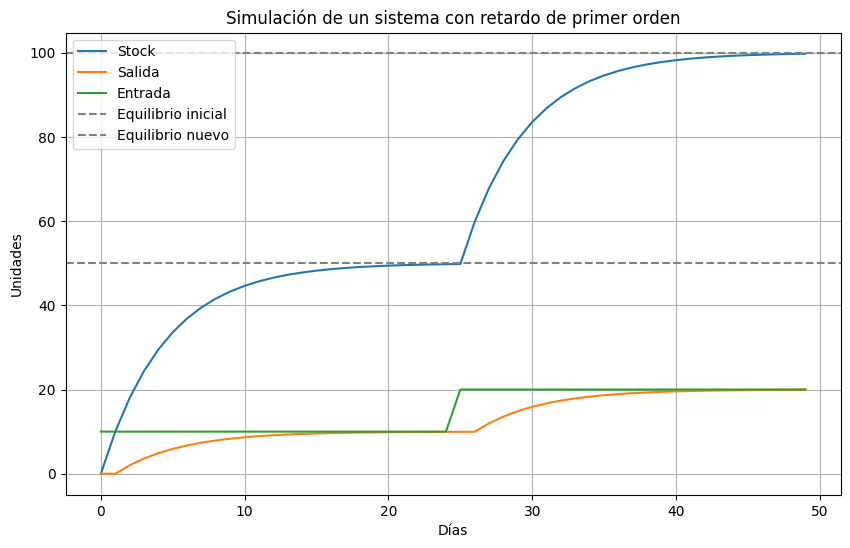

In [1]:
import matplotlib.pyplot as plt

# Parámetros
dias = 50
retardo = 5
entrada = 10
entrada_cambio = 20
dia_cambio = 25

# Inicialización
stock = [0]
salida = [0]
entrada_hist = []

# Simulación con integración de Euler
for t in range(dias):
    # Entrada cambia en el día 25
    if t >= dia_cambio:
        entrada_actual = entrada_cambio
    else:
        entrada_actual = entrada
    entrada_hist.append(entrada_actual)

    # Calcular salida y cambio de stock
    salida_actual = stock[-1] / retardo
    cambio_stock = entrada_actual - salida_actual
    nuevo_stock = stock[-1] + cambio_stock

    # Guardar resultados
    salida.append(salida_actual)
    stock.append(nuevo_stock)

# Eliminar último valor extra
stock = stock[:-1]

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(stock, label="Stock")
plt.plot(salida[:-1], label="Salida")
plt.plot(entrada_hist, label="Entrada")
plt.axhline(y=entrada * retardo, color='gray', linestyle='--', label="Equilibrio inicial")
plt.axhline(y=entrada_cambio * retardo, color='gray', linestyle='--', label="Equilibrio nuevo", linewidth=1.5)

plt.xlabel("Días")
plt.ylabel("Unidades")
plt.title("Simulación de un sistema con retardo de primer orden")
plt.legend()
plt.grid(True)
plt.show()


La gráfica muestra el comportamiento dinámico de un sistema con retardo de primer orden ante una entrada constante y un cambio abrupto en dicha entrada. Inicialmente, con una entrada de 10 unidades por día y un retardo de 5 días, el stock aumenta exponencialmente desde cero hasta aproximarse al equilibrio de 50 unidades, donde la salida iguala la entrada. Este comportamiento refleja el ajuste gradual típico de un sistema con memoria, donde la salida depende del stock acumulado. Al introducir un cambio en la entrada el día 25, duplicándola a 20 unidades por día, el sistema responde de forma suave: el stock comienza a crecer nuevamente hasta alcanzar un nuevo equilibrio de 100 unidades, mientras que la salida se ajusta lentamente hasta igualar la nueva entrada. Este análisis evidencia cómo los sistemas con retardo no responden instantáneamente a los cambios, sino que tienden al equilibrio de manera exponencial, lo cual es fundamental para entender procesos de acumulación y ajuste en sistemas reales.